In [1]:
import torch
import torchvision.models as models
import numpy as np

In [2]:
vgg19 = models.vgg19(pretrained=True)

In [10]:
#vgg19.forward()

In [3]:
# Pytorch tutorials
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [4]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


 0.7795  0.8846  1.0322
 1.1094  1.5361  0.8929
 0.6947  1.6492  0.7578
 1.5991  1.5869  0.3511
 0.6565  0.6331  0.9933
[torch.FloatTensor of size 5x3]

In [5]:
# Gradient
x = torch.autograd.Variable(torch.ones(2, 2), requires_grad=True)

In [6]:
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [7]:
y = x + 2

In [8]:
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [9]:
y.grad_fn

In [10]:
z = y*y * 3

In [11]:
out = z.mean()

In [12]:
z

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

In [13]:
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [14]:
out.backward()

In [15]:
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

In [72]:
IMG = '../dumps/vg.jpg'

In [87]:
# Loading image
import matplotlib.pyplot as plt
from torchvision import transforms

def process(path):
    img = plt.imread(path)
    transformer = transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225])
        ]
    )
    return transformer(img)

def show_image(img):
    img = img.numpy()
    img = img.swapaxes(0, 2)
    img = img.swapaxes(0, 1)
    print img.shape
    plt.imshow(img)
    plt.show()
    

(256, 256, 3)


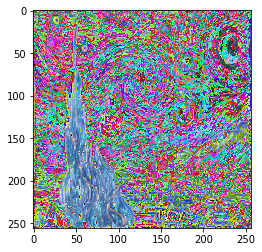

In [88]:
img = process(IMG)
show_image(img)

In [106]:
img = img.unsqueeze(0)
X = torch.ones((1, 3, 256, 256))
X = torch.autograd.Variable(X)
#vgg19.features.forward(X)

In [138]:
features = []

from collections import OrderedDict
#vgg19.features._forward_hooks  = OrderedDict()

def save(self, inp, out):
    #print self
    features.append(out.data)

for layer in vgg19.features:
    if isinstance(layer, nn.ReLU):
        layer._forward_hooks = OrderedDict()
        layer.register_forward_hook(save)

In [139]:
output = vgg19.features.forward(X)

In [140]:
len(features)

16

In [144]:
for f in features:
    print f.shape

torch.Size([1, 64, 256, 256])
torch.Size([1, 64, 256, 256])
torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 128, 128])
torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 64, 64])
torch.Size([1, 512, 32, 32])
torch.Size([1, 512, 32, 32])
torch.Size([1, 512, 32, 32])
torch.Size([1, 512, 32, 32])
torch.Size([1, 512, 16, 16])
torch.Size([1, 512, 16, 16])
torch.Size([1, 512, 16, 16])
torch.Size([1, 512, 16, 16])


RuntimeError: inconsistent tensor size, expected tensor [3 x 256 x 256] and src [64 x 256 x 256] to have the same number of elements, but got 196608 and 4194304 elements respectively at /pytorch/torch/lib/TH/generic/THTensorCopy.c:86